CLUSTERING IN MACHINE LEARNING
=======

In [3]:
def hide():

    return HTML('''<script>
            code_show=true; 
            function code_toggle() {
             if (code_show){
             $('div.input').hide();
             } else {
             $('div.input').show();
             }
             code_show = !code_show
            } 
            $( document ).ready(code_toggle);
            </script>
            <form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

hide()

In [4]:
import numpy as np
import pandas as pd
import random
import sys
from PIL import Image
import matplotlib.image as mpimg
from skimage import color
from skimage import io
import matplotlib.pyplot as plt
from IPython.display import HTML
hide()

##  Background 

Clustering is in simple terms grouping most (silimilar items together and most different items in separate groups.
This similarity we use on daily basis in our nearby environment for grouping objects like good apples, food or even good friends. We generally tend to choose some set of features like color,shape,texture,taste to calculate the likeliness/similarity between them.It need not be just one feature which sometimes help us in grouping objects. It could be multivariate similarity. Clustering in machine learning is synonymous emulation process for machines to search for similar objects.

<h2> Objective </h2>

The goal of this notebook is walk through clustering in context of machine learning and give thorough understanding about some one main type of clustering often used i.e. Kmeans method. We will then see with implementation of kmeans and kmeans++ algorithm  how clustering is used for classfying similar groups and identifying its lables with some examples ranging from tabular data to images.Later we will touch upon possible challenges in our algorithm and future scope of improvements.

<br>
For curious souls, there is a last section for further reads !!!

<h3> Index </h3>

1.  [Introduction to Clustering](#SQL)  </br>

3.  [Clustering Similarity](#cs) </br>
<br>
2.  [Types of Clustering](#Joins) </br>
<br>
4.  [Kmeans Clustering](#Python) </br>

5.  [Kmeans Examples](#tables) </br>

6.  [Kmeans++ Clustering](#examples2)</br>

7.  [Kmeans++ Examples](#example3)</br>

8.  [Elbow Method for finding K](#elbow)</br>

9.  [Image Compression using Clustering](#imgcomp)</br>

10. [Future Scope](#ex_otm_mtm)</br>

11. [Jupyter Notebook](#Notebook_Link)</br>

12. [Conclusion](#conclusion)</br>

13. [Readings](#practice_Link)</br>


<a id="SQL"></a>
<h1> Introduction to Clustering 

<h2> Why Clustering is Unsupervised Learning?

Clustering falls under unsupervised machine learning as machine unlike us sometimes maynot have clear labels attached to some of the objects to start with. E.g by looking at a apple we know that it's an apple because our mind is trained to see a lot of objects like apple since childhood. But let's say a company is running curated sets of marketing ads and want to segment users suitable for individual ads. To calculate similarity between users, it would require some information like user profile, background purchase history and other information since they don't have exact prior external label to group users. Hence, it is a learning which is unsupervised and learnt based on likeliness scores. So, these features becomes these factors for learning and to calculate similarity index. 


In [5]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/cluster.png')
im = im.resize((500,300),Image.ANTIALIAS)
hide()


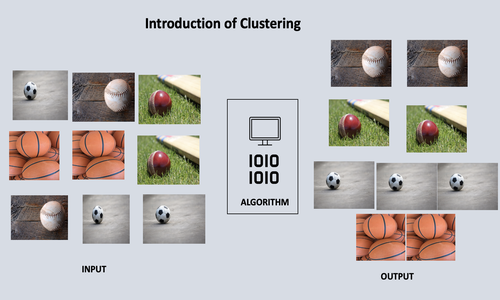

In [6]:
im

  Above image demonstrates how machine finds a pattern to segregate different type of balls. 
  
 *  To start with it has all different types of balls together and every ball has some features (in form of binary coded values here).
 *  Machine which is our clustering algorithm used will try to identify patterns in these computer coded features. 
 *  And voila, it's able to find three different sets of balls (basketball, football and volleyball)

## Now next question would arise how many curated ads should they run? </b>

Now the next obvious question is how many groups should you choose so that all your data will be grouped together. This is subjective for humans but for machines it is one of the most important parameter to find out ideal number of clusters. Some algorithms requires to mention clusters for which there are ways to find optimal e.g. Elbow Method or Silhoutte cofficient. Some maynot need them like hierarchical method of clustering(explained a little later). 


<a id="cs"></a>
<h1> Similarity of Cluster

There are different distance measures for calculating similarity between two values ranging from simple euclidean distan, manhattan to cosine similarity. Choice is dependent on the type(categorical or numerical) and dimensionality of data we are dealing with. In my implemenation of kmeans and kmeans++ , I will be using Euclidean distance for simplicity.

In [7]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/images2.png')
im = im.resize((400,400),Image.ANTIALIAS)
hide()
#https://towardsdatascience.com/9-distance-measures-in-data-science-918109d06

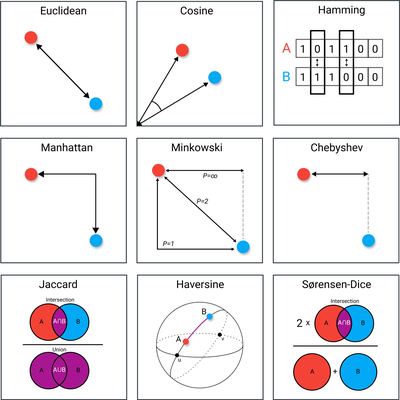

In [8]:
im

Credits: https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa

<a id="Joins"></a>
<h1> Types of Clustering 

There are different methods of clustering depending on difference in base algorithm used.
Most common broad types are: partition and hierarchical clustering.
* Partition(centroid based) again can be done from differet ways,e.g. kmeans/k medians algorithm,mean shift and spatial clustering algorithm (density based), expectation maximising algorithm based on gaussian mixture models(clusters maynot be circular).


* Hierarchical may include top-down(divisive) or bottom-up (hierarchical agglomerative clustering), these approaches have one cluster to branching to sub clusters ot all points in separate clusters to clubbing them in broader groups. There are further model based clustering like RF.

<a id="Python"></a>
<h1> Kmeans Algorithm

It is an iterative process in which it tries to minimize the distance of the data points from the centroid points. It’s used to group the data points into k number of clusters based on their similarity. Euclidean distance is used to calculate the similarity. 

Advantages :
It is easy to implement and faster than most of the clustering algorithms. It also provides clear tight boundaries unlike hierarchical clustering.

Disadvantages:
Kmeans as take random points initially as centroids, so it can give different results on each run. hence, it's less stable than kmeans++. Also it performs poorly on nested joint data points(will see later).

In [114]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/kmeansalgo.png')
im = im.resize((600,400),Image.ANTIALIAS)
hide()


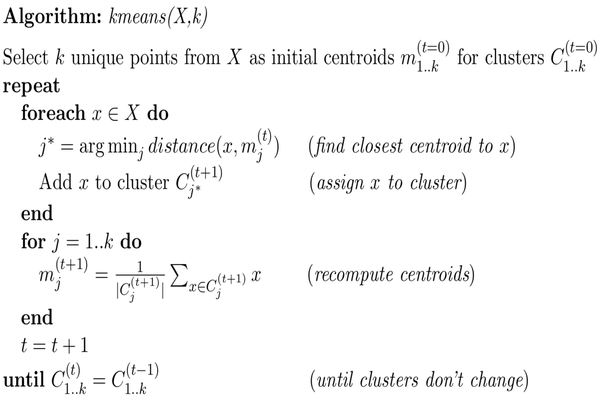

In [115]:
im

Let us understand this with one example of points shown below.
* <b> Step 1 </b>- We can assume to take take 2 clusters (k) initially .
* <b> Step 2 </b>- Two points are randomaly initlaised to be taken for icentroid initialisation. Let's say we pick, (2,2) and (2,10)
* <b> Step 3 </b>- Calculate distance of all points in data from these two centroids using euclidean distance and assign each point to closest centroid (its cluster).Here, cluster (2,2) will have all below graph points and above in (2,10)
* <b> Step 4 </b>- Update the centroid value by calculating mean of all points falling in the cluster. Now, the centroid will move to white spaces between above groups and below groups of graph(between 4-8). 
* <b> Step 5 </b>- Repeat above process of reassignment of data points to new clusters.Iterate Steps (3 & 4) until centroid position keeps changing(high tolerance) or maximum number of iterations is achieved.


We can repeat above processing by changing number of cluster k= 4(can use elbow method to get) here and see if our clusters are more distinguishable. 


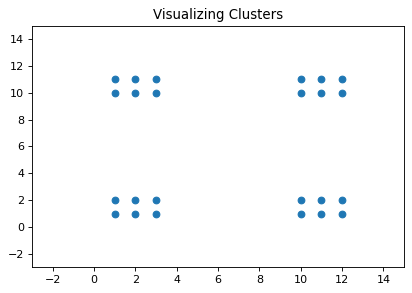

In [23]:
plt.figure(figsize=(6, 4), dpi=80)
plt.scatter(X[:,0],X[:,1])
plt.title("Visualizing Clusters")
plt.xlim([-3, 15])
plt.ylim([-3, 15])
plt.show()

<b> Implementation of code is divided in clear blocks of tasks at hand:</b>
    
1. Random initialising centroids using python random choice
2. Distance Metric function , here euclidean distance
3. Kmeans main loop for iterating process of reassigning centroid based on mean of cluster. 

Centroid Initialisation for kmeans
```python
random_index = np.random.choice(len(X), k, replace=False)
ctds = X[random_index, :]
ctds= np.array(ctds)
```

Iterative reassignment of centroids

```python
for i in range(max_iter):

    distances=distance_sqrt(X,ctds)
    closest_ctd = np.argmin(distances, axis=1)         

    K, D = ctds.shape
    new_ctds = np.empty(ctds.shape)
    for j in range(ctds.shape[0]):

        new_ctds[j] = np.mean(X[closest_ctd == j], axis = 0)

        if np.sum((new_ctds - ctds)/ctds * 100.0) > tolerance:
            break

    ctds=new_ctds

    distances=distance_sqrt(X,ctds)
    closest_ctd = np.argmin(distances, axis=1)
 ```

<a id="tables"></a>
<h1> Examples of Kmeans

The result of kmeans on previous data: when clustered with k=2 and when clustered with k=4. We can see ideal clusters could be k=4 here.

In [37]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/image24.png')
im = im.resize((600,400),Image.ANTIALIAS)
hide()

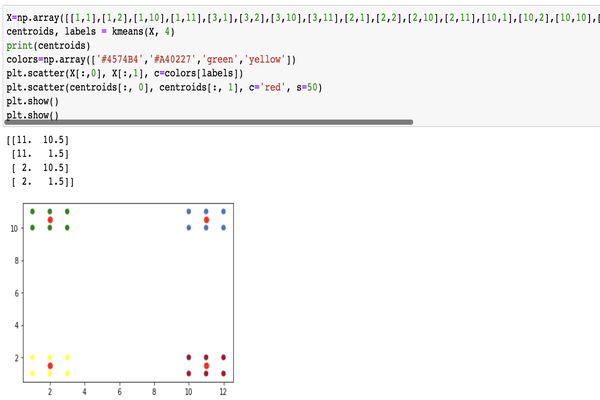

In [38]:
im

<a id="examples2"></a>
<h1> Kmeans++ Algorithm

Kmeans++ is different from kmeans in only process of finding first set of centroids which is done randomly in kmeans. But in kmeans++ , we try to find k centroids across data points such that all each are at maximum distance from other clusters. 

Advantage of kmeans++ over kmeans is that it convergest faster because of final centroids may lie somewhere near to initial one. Also it shows genrally better performance in image compression(which we can see below).

In [123]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/kmeansplus.png')
im = im.resize((500,300),Image.ANTIALIAS)
hide()

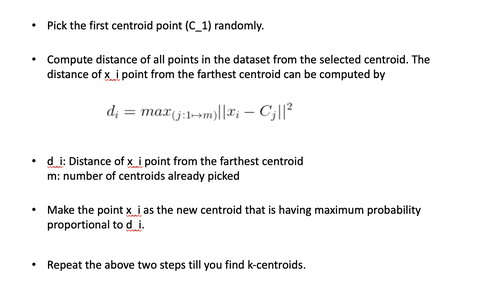

In [111]:
im

<b> Implementation of Kmeans++:</b>

```python

def kmeans_plus_plus(X, k):
    ctds = []
    X = np.array(X)

    first_idx = np.random.choice(range(X.shape[0]), )
    ctds.append(X[first_idx, :].tolist())
    
    for i in range(k - 1):
        distance = dist(X, np.array(ctds))
        min_dist = np.min(distance, axis = 1)
        max_idx = np.argmax(min_dist, axis = 0)
        new_ctds = X[max_idx, :]
        ctds.append(new_ctds.tolist())
        
    return np.array(ctds)
```


<a id="examples3"></a>
<h1> Kmeans++ Example

For example, if we pick k =3 in previous dataset, kmeans will always pick a triangle in first initialization to maximize distances between all three centroids. Similarly, kmeans++ will always give 4 clear clusters in its first initialization only for this data to maximuze distance between centroids.

In [54]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/plus.png')
im = im.resize((400,400),Image.ANTIALIAS)
hide()

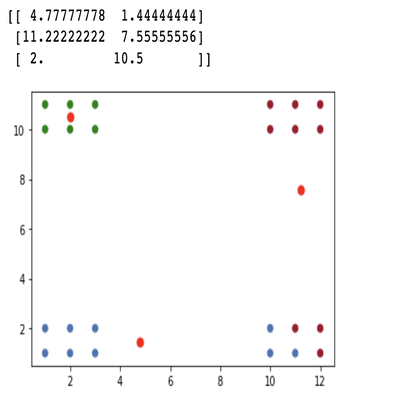

In [47]:
im

 <b> Drawbacks of Kmeans and Kmeans++ </b>

We can see poor performance of kmeans or kmeans++ of disjoint and nested structures where it's not able to pick internal cluster as separate.These can be avoided with other methods of clustering like spectral clustering

In [119]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/image7.png')
im = im.resize((400,400),Image.ANTIALIAS)
hide()


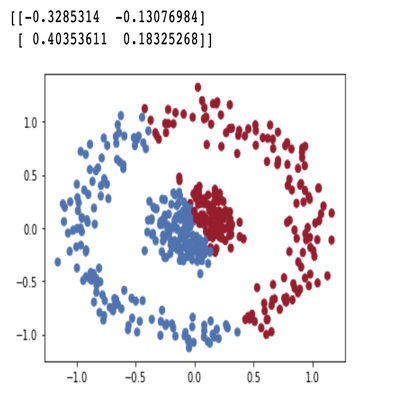

In [120]:
im

 We can see below spectral clustering gives  clearly seperated clusters in this cases\.

In [48]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/nested_spectral.png')
im = im.resize((400,400),Image.ANTIALIAS)
hide()


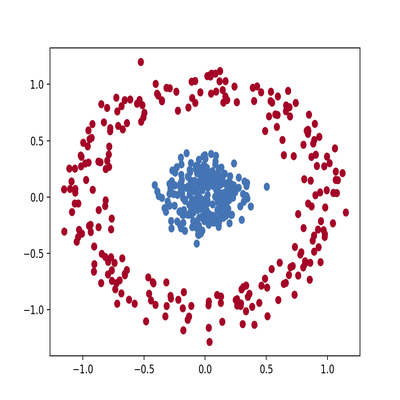

In [49]:
im

<a id="elbow"></a>
<h2> Elbow Method to Find optimum Clusters

The elbow method helps in finding the optimal number of clusters for k-means clustering. The elbow method plots the value of the loss for different values of k. If k increases, average loss will decrease since each cluster will have fewer points, and tthere will be less loss of data. But we want to find out that k when the decrease in loss becomes almost flat line i.e. we need to find k for elbow in plot.

Diasdv: This process requires running clustering for all possible k ranges gives to it. Hence, for large datasets can be slow.

In [137]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/elbow.png')
im = im.resize((600,400),Image.ANTIALIAS)
hide()

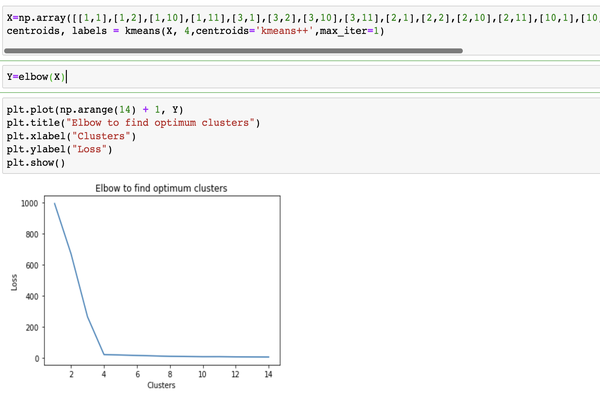

In [138]:
im

<a id="imgcomp"></a>
<h2> Image Compression Examples based on Kmeans++ Clustering

In [ ]:
As we can see

One of the common application of clustering is infield of Image compression.KMeans Clustering algorithm takes advantage of the visual perception of the human eyes and it will use few colors to represent the same image. Colors having different values of intensity that are RGB values seem the same to the human eye. The K-Means algorithm takes this advantage and clubs similar looking colors(pixel values). This may hamper image quality but gives ability to store big images as small.

Let us understand it with one example of grayscale image.Our kmeans++ algorithm is flexible enough to be used in it. It just needs image as array of pixel values to label them. For this:

* <b> Step 1 </b>- Load image in python using imread as array of pixel values .

* <b> Step 2 </b>- The size of the input image could be (rows, cols, 3) or (rows, cols) (in grayscale), flatten all the pixel values to a single dimension of size (rows*cols) and its elements will either 3 RGB values for colored image or rone pixel value for grayscale.

* <b> Step 3 </b>- Implement k-Means++ algo to find k-centroid points which will be its surrounding color approximation pixel values.

* <b> Step 4 </b>-  Replace the value of each of the pixels with its ccentroid of its cluster and reshape the image to its actual dimension of (rows,cols,3) or (rows,cols).


<h2> GrayScale Image Example

One of the grayscale images is compressed to 8 clusters(different pixel values). We can see the prformance is good for 8 clusters.Though lossy compression is visible to a human eye, actual content is not lost at cost of reduction of size.

```python
image = io.imread('/Users/surbhiprasad/dsa/lena.png')
io.imshow(image)
io.show()

rows = image.shape[0]
cols = image.shape[1]
zeros=np.zeros(len(np.array(image).reshape(-1,1)))
combined = np.hstack((np.array(image).reshape(-1,1), zeros.reshape(-1,1)))
X=image

k=8
centroids, labels = kmeans(combined, k=k,centroids='kmeans++', tolerance=.01)
centroids = centroids.astype(np.uint8)
X = centroids[labels] # reassign all points
final_image_pixels=np.array([x[0] for x in X])
```

In [71]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/lena1.png')
im = im.resize((500,300),Image.ANTIALIAS)
hide()

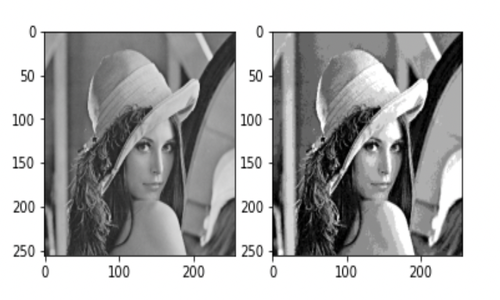

In [72]:
im

<h2> Colored Image Example

The process followed is similar , it's just that now we have three pixel values(RGB) per element of array. For colored images also, the algorithm perform well. 

Image Credits: As my fiance was going crazy to include him in the project, I thought of this being the perfect way out.

In [95]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/arpitz.png')
im = im.resize((800,500),Image.ANTIALIAS)
hide()

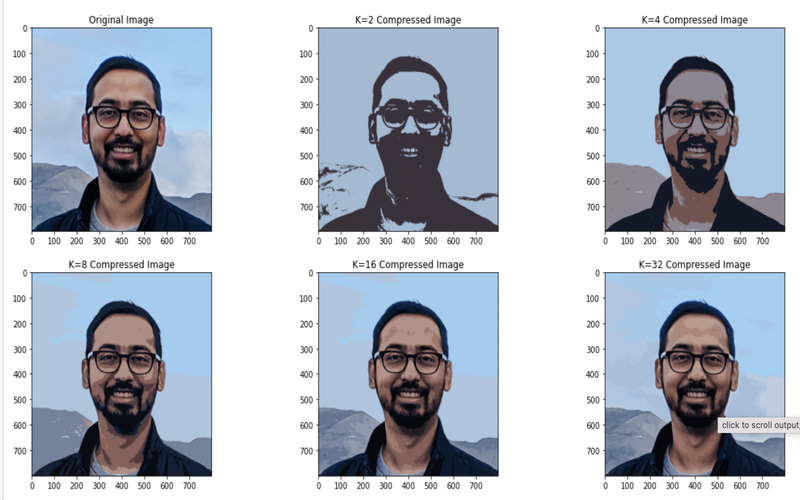

In [96]:
im

From images, that k=2 and k=4 clusters aren't good to identigy with image.Also, it's visible that with k=8 clusters(just 8 RGB values), we have reduced image and there seems to have some significant lossof data as well(clouds and mountains) compared to first image(original).Hence, with clusters k=32 , we do get a decent compressed image picking facial uneven shaded, clouds, mountain colors as well.

Let us try on another example with many variations of color to see performance. We see below that the image after k=16 clusters are acceptable with not much distortion.

In [128]:
from PIL import Image
im = Image.open('/Users/surbhiprasad/dsa/birds.png')
im = im.resize((800,500),Image.ANTIALIAS)
hide()

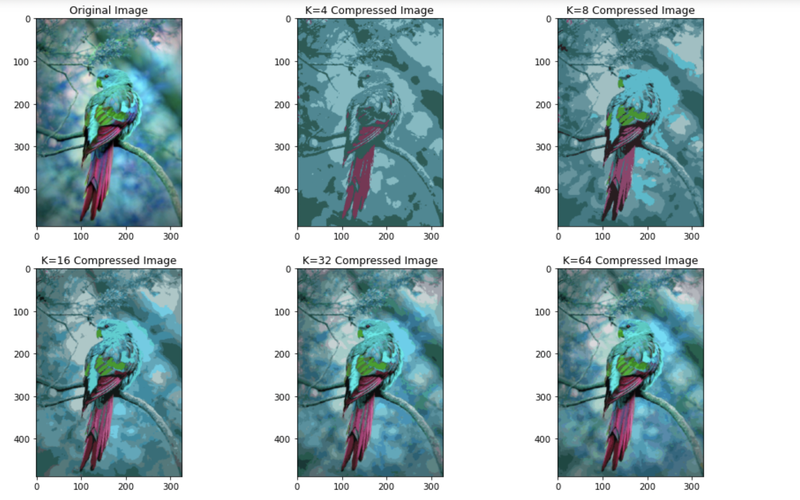

In [129]:
im

<a id="ex_otm_mtm"></a>
<h2> Future Scope  </h2>



* We can try different methods of distance calculation to check for imporvement in clusters, as we can see there is scope 

* We can further explore other methods of clustering like spectral and model based algorithm to compare performance on similar data.

* Other initialization methods can be explored



<a id="Notebook_Link"></a>
<h2> Jupyter Notebook  </h2>



For more info and examples using concrete data, please see our [Notebook](https://github.com/mveele/SQL_join_comms/blob/main/comms_project.ipynb).

<a id="conclusion"></a> 
<h2> Summary </h2>

We covered the goal of this project starting with what is clustering. Then we got to see why clustering is unsupervised machine learning and how similar it is to our real world scenarios. We further got a glipmse of how similarity is found by machines, how many clusters we should keep. We touched briefly upon types of clustering algorithms available of which we deep dived into Kmeans Clustering method. We implemented the same and saw its resulst on tabular and image data. Then we touched upon kmeans++ method of centroid initialization and compared two algorithms. We saw some shortcoming attached with theses algorithm on nested data. 
Then we explored further Image compression with Kmeans using grayscale and colored images. 
And we concluded with exploring elbow method to find the right cluster and reduce manual intervention.

Hence, there is scope for further explorations for improving current algorithm using different distance metrics and exploring other clustering algorithm for nested datasets.




<a id="practice_Link"></a>    
<h2> Reading Material  </h2>


A. Kmeans: [KMeans Clustering](https://www.youtube.com/watch?v=hDmNF9JG3lo)

B. Image Compression: [Image Compression using Kmeans](https://analyticsindiamag.com/beginners-guide-to-image-compression-using-k-means-clustering/)

C. Types of Clustering: [Types of Clustering](https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering)

D. Different Distances: [Distance Metrics](https://machinelearningmastery.com/distance-measures-for-machine-learning/)

E. Applications of clustering [Applications](https://datafloq.com/read/7-innovative-uses-of-clustering-algorithms/)